In [1]:
# note run the data generator first.. this is only to handle the outputs of it.. 

In [2]:
import numpy as np
import pandas as pd

%matplotlib inline
from matplotlib import pyplot as plt

plt.rcParams['figure.figsize'] = 15, 10

In [3]:
curves = pd.read_pickle("outputs/all_metrics.pickle")

In [4]:
def display(curves, model):
    #sample sizes
    curves = curves.sort_values(by=["samples"])
    idx = curves["model.ident"] == model
    
    if True:
        train =  np.array(curves[idx]["train.support"].tolist())
        valid =  np.array(curves[idx]["valid.support"].tolist())
        
        plt.plot(curves[idx]["samples"], train[:,0], "-o", label="train - false")
        plt.plot(curves[idx]["samples"], valid[:,0], "-o", label="valid - false")
        plt.plot(curves[idx]["samples"], train[:,1], "-o", label="train - true")
        plt.plot(curves[idx]["samples"], valid[:,1], "-o", label="valid - true")
        
        plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
        plt.xscale("log")
        plt.title(model + " - sample sizes")
        plt.grid(True)
        plt.show()

    
    if True:
        train =  np.array(curves[idx]["train.support"].tolist())
        valid =  np.array(curves[idx]["valid.support"].tolist())
        totals_train = np.sum(train, axis=1)
        totals_valid = np.sum(valid, axis=1)
                
        plt.plot(curves[idx]["samples"], train[:,0].astype(np.float)/totals_train, "-o", label="ratio train - false")
        plt.plot(curves[idx]["samples"], valid[:,0].astype(np.float)/totals_valid, "-o", label="ratio valid - false")
        plt.plot(curves[idx]["samples"], train[:,1].astype(np.float)/totals_train, "-o", label="ratio train - true")
        plt.plot(curves[idx]["samples"], valid[:,1].astype(np.float)/totals_valid, "-o", label="ratio valid - true")
        
        plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
        plt.xscale("log")
        plt.title(model + " - sample sizes")
        plt.grid(True)
        plt.show()    
        
    measures = ["acc", "loss", "mse"]
    for m in measures:
        plt.plot(curves[idx]["samples"], curves[idx]["train." + m], "-o", label="train")
        plt.plot(curves[idx]["samples"], curves[idx]["valid." + m], "-o", label="valid")
        plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
        plt.xscale("log")
        plt.title(model + " - " + m)
        plt.grid(True)
        plt.show()
    
    measures = ["recall", "prec", "fscore"]
    for m in measures:
        train =  np.array(curves[idx]["train." + m].tolist())
        valid =  np.array(curves[idx]["valid." + m].tolist())
        
        plt.plot(curves[idx]["samples"], train[:,0], "-o", label="train - false")
        plt.plot(curves[idx]["samples"], valid[:,0], "-o", label="valid - false")
        
        plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
        plt.xscale("log")
        plt.title(model + " - " + m + " - false")
        plt.grid(True)

        axes = plt.gca()
        axes.set_ylim([-0.05,1.05])
        plt.show()
        
        plt.plot(curves[idx]["samples"], train[:,1], "-o", label="train - true ")
        plt.plot(curves[idx]["samples"], valid[:,1], "-o", label="valid - true ")

        plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
        plt.xscale("log")
        plt.title(model + " - " + m + " - true")
        plt.grid(True)

        axes = plt.gca()
        axes.set_ylim([-0.05,1.05])
        plt.show()

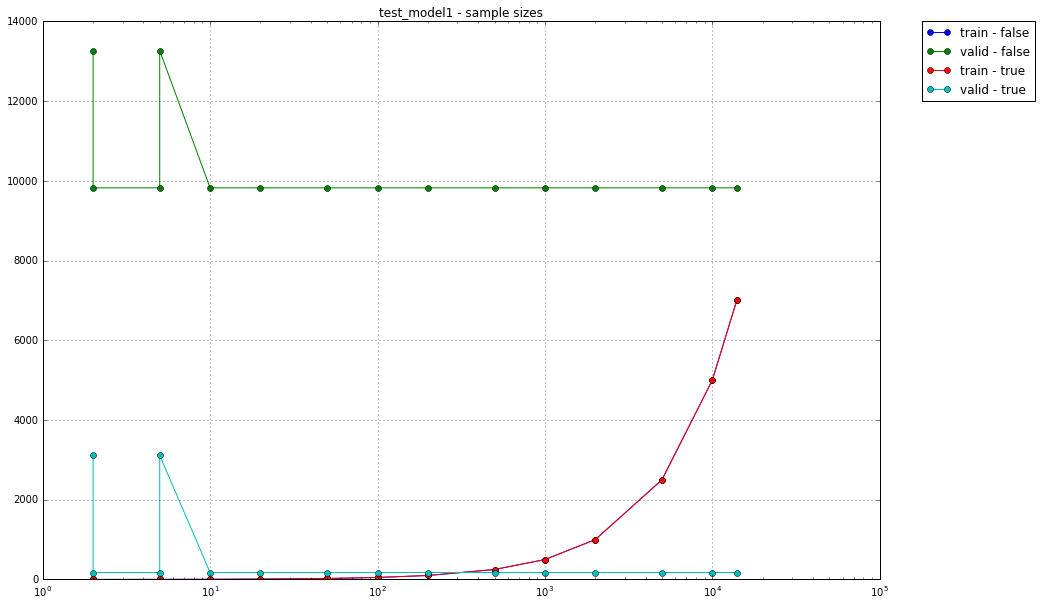

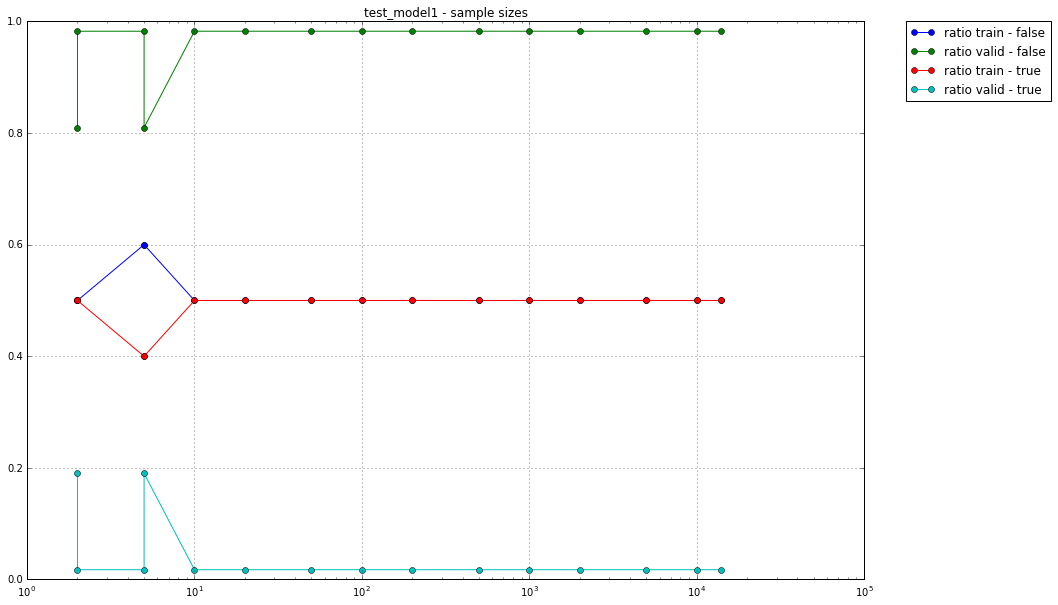

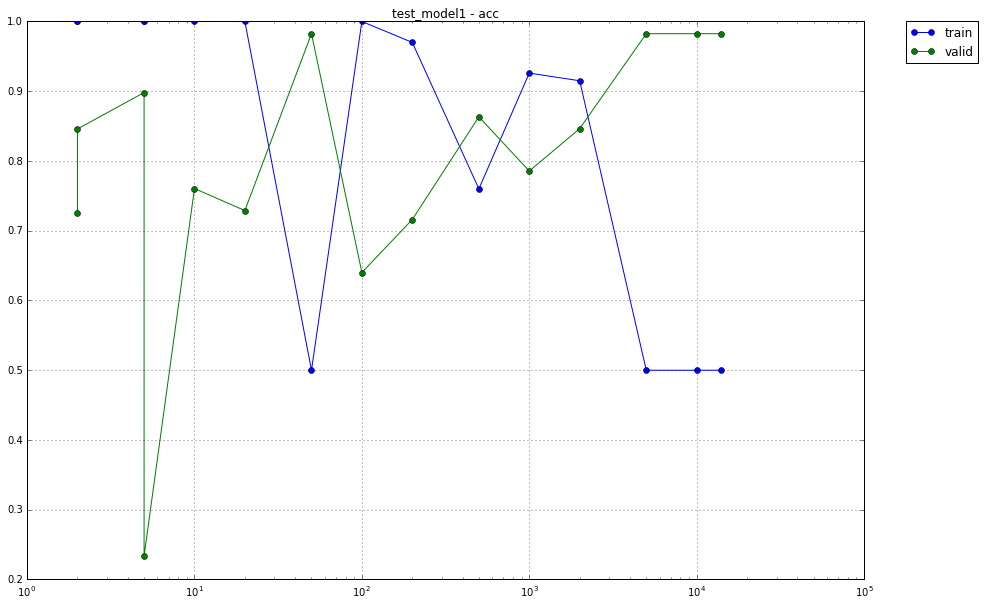

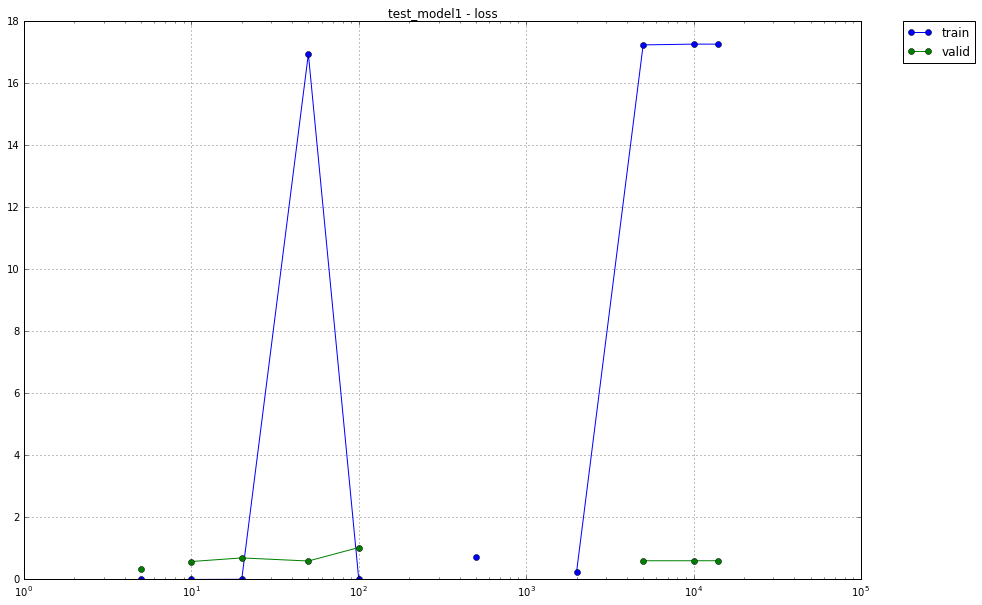

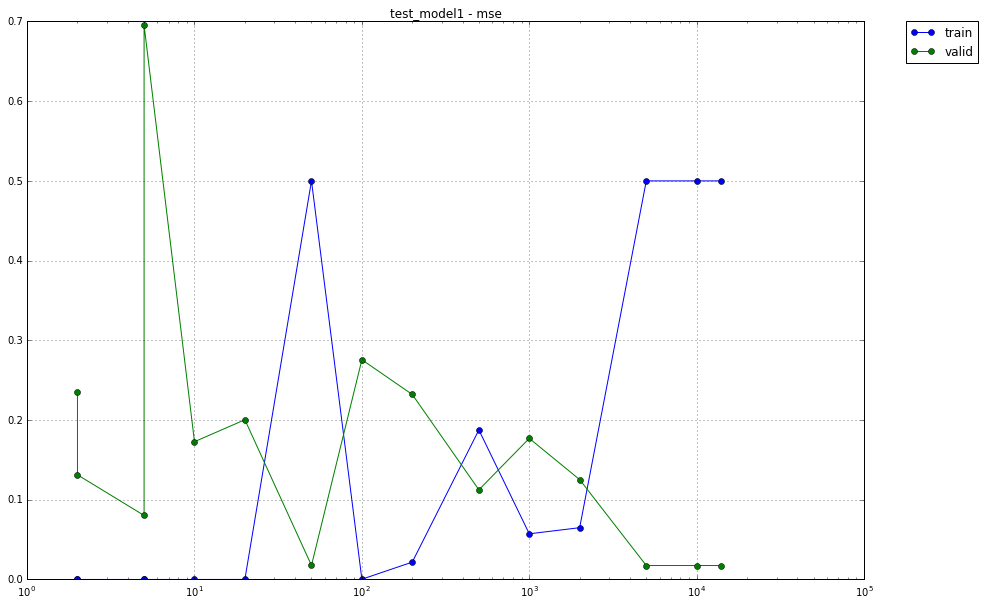

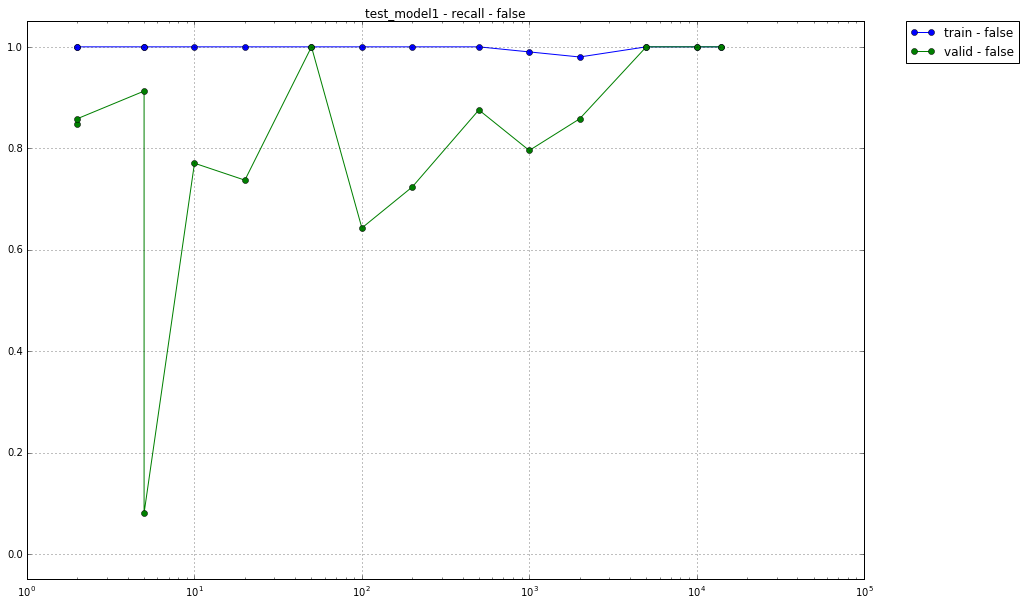

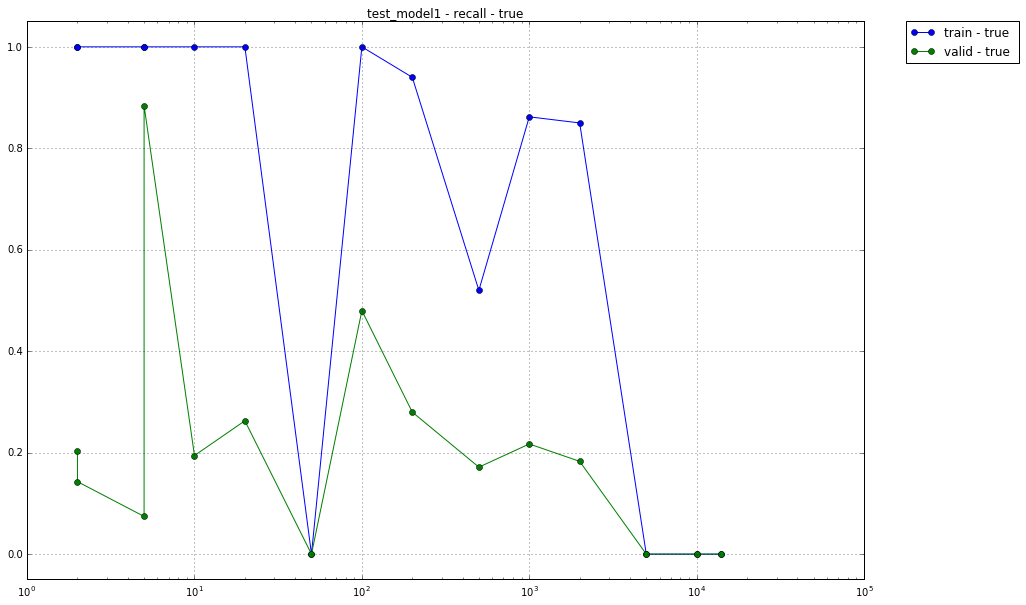

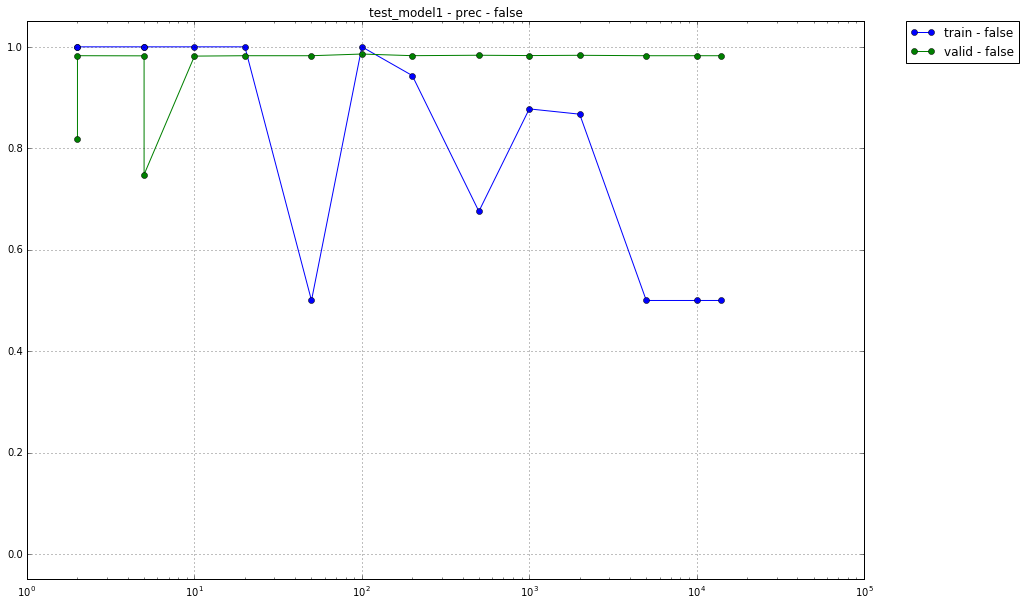

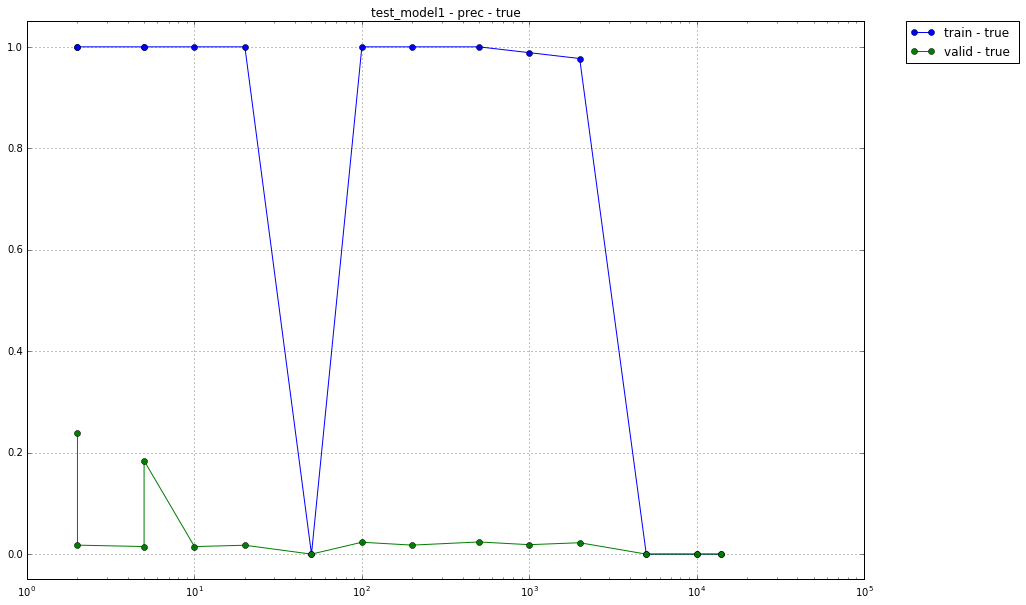

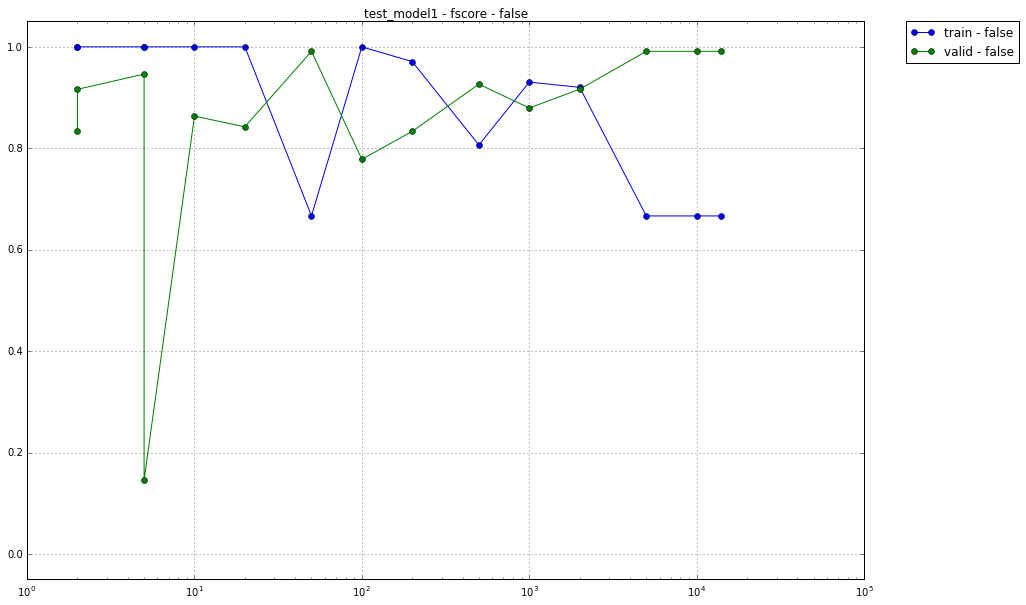

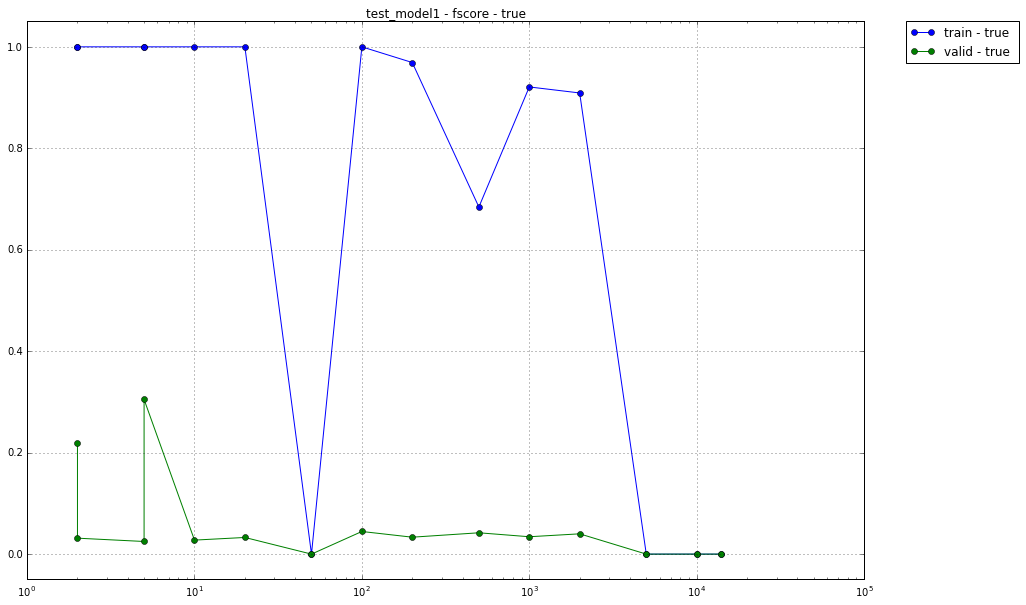

In [5]:
display(curves,"test_model1")

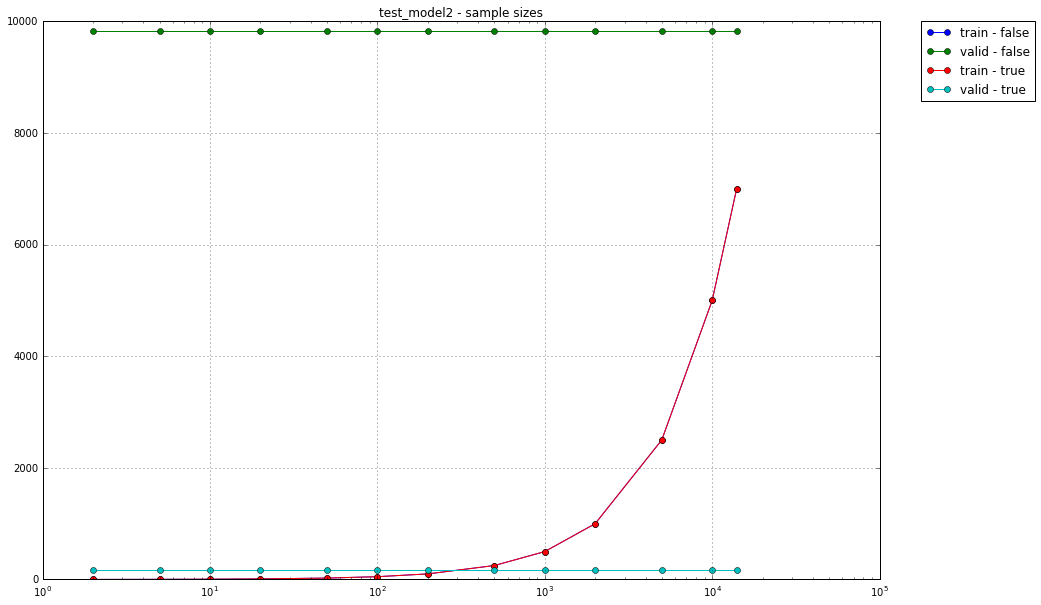

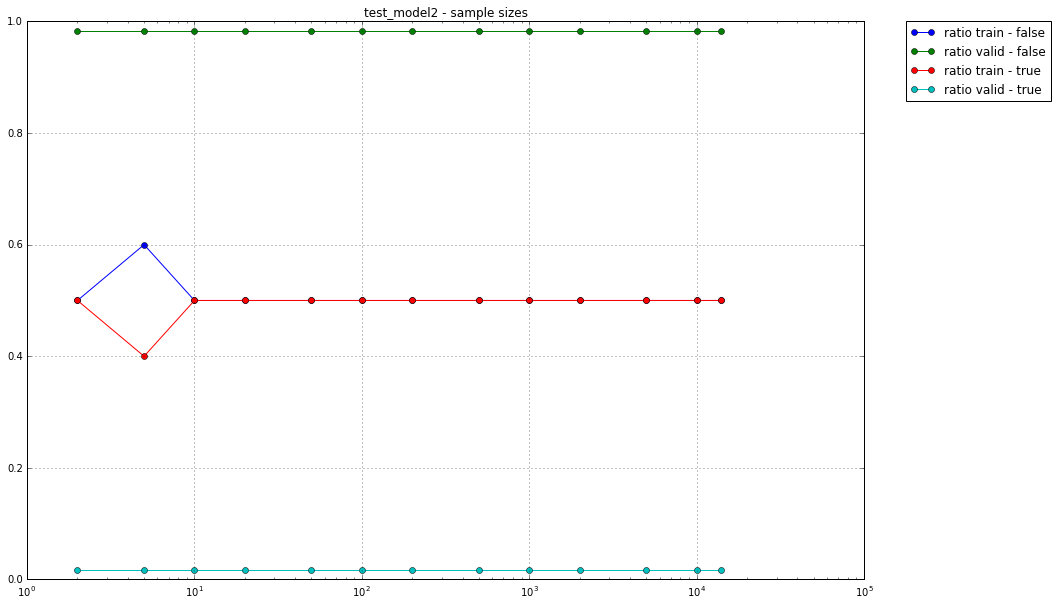

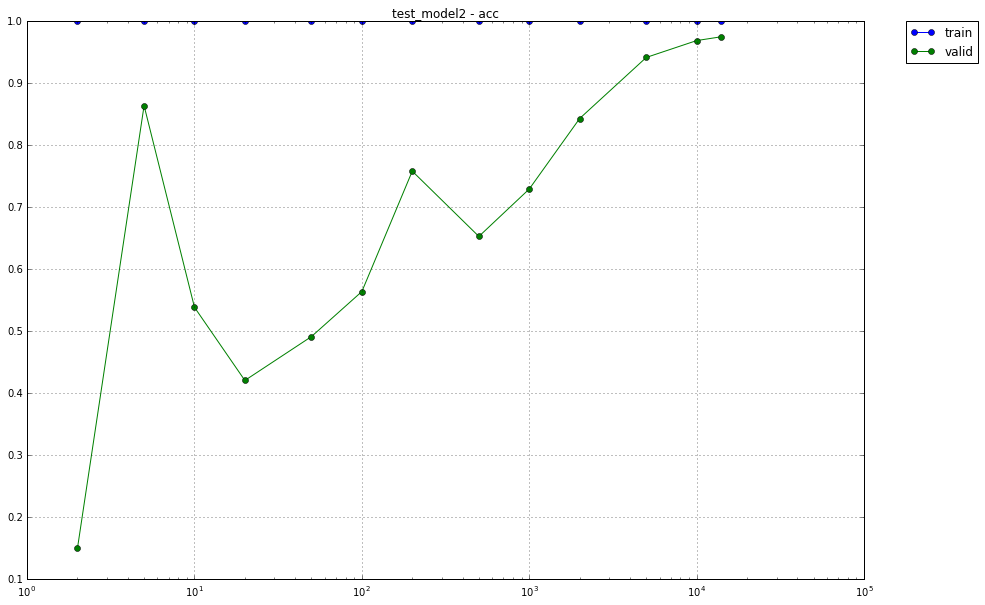

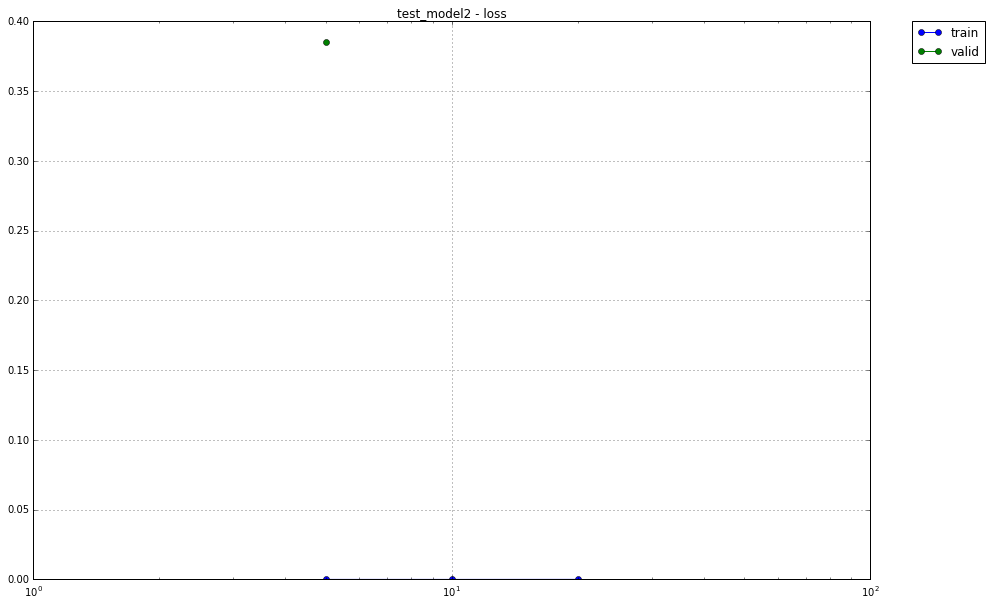

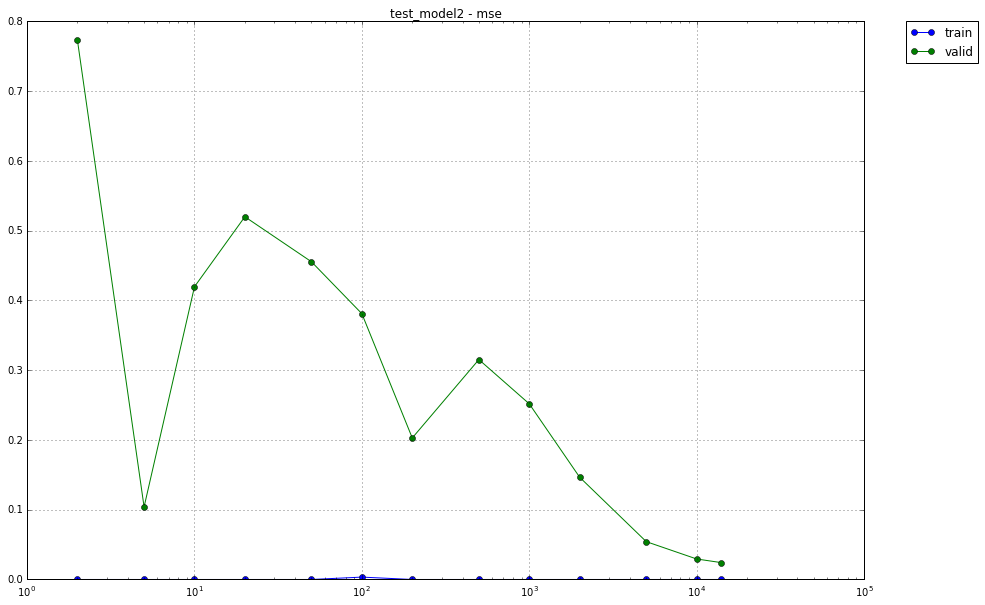

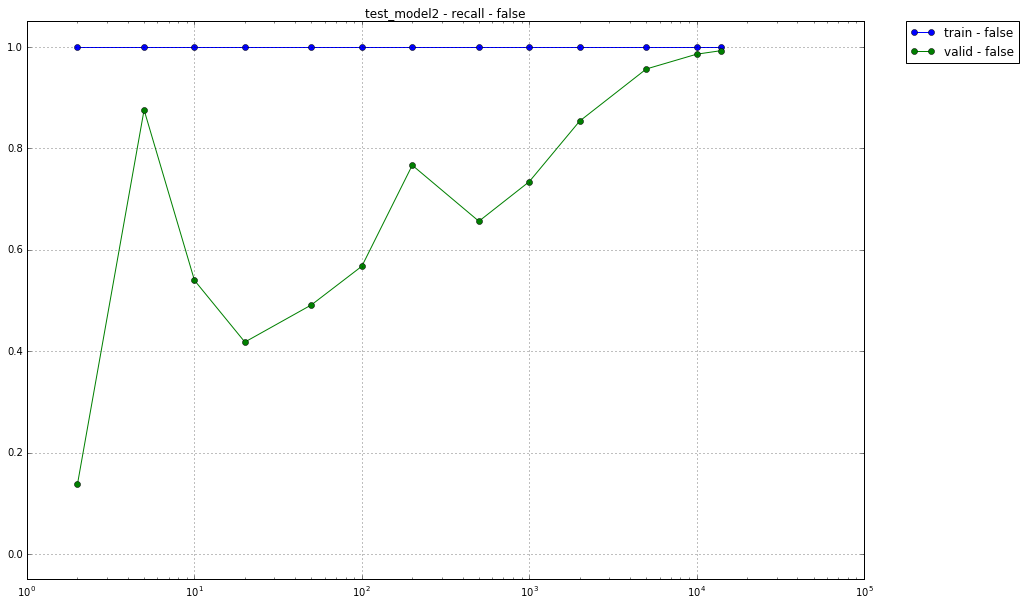

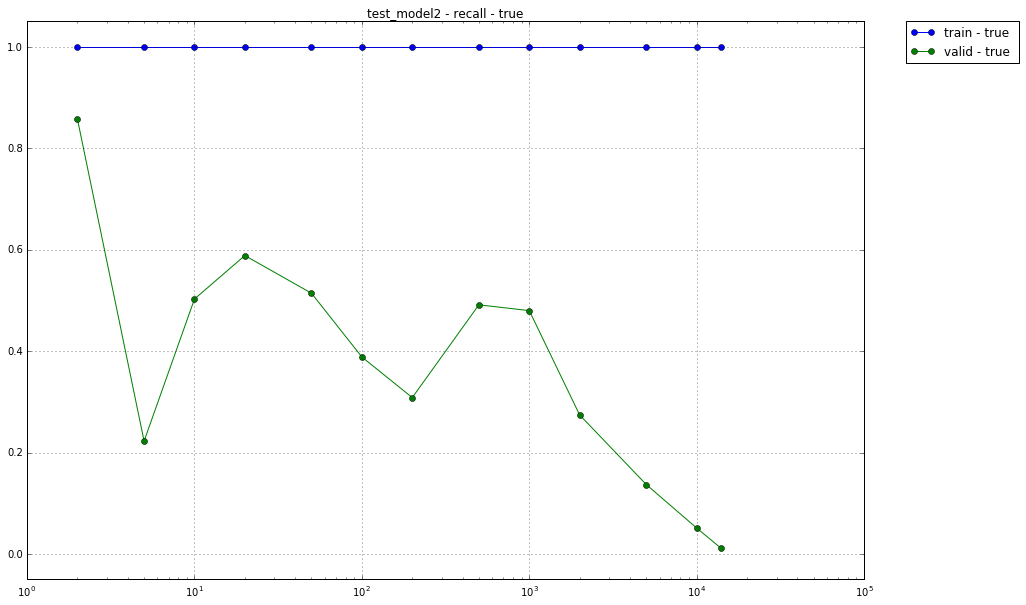

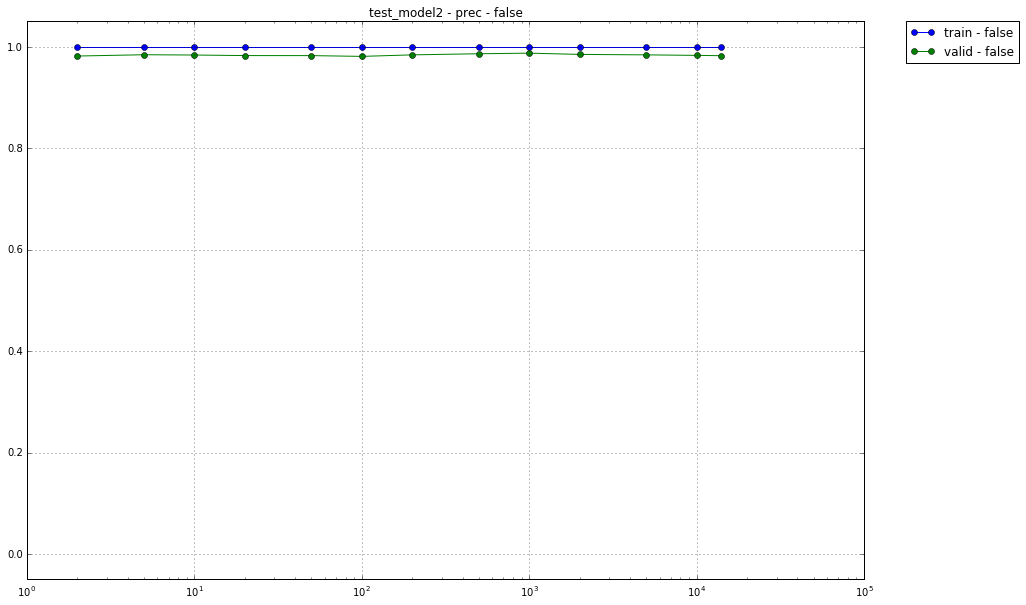

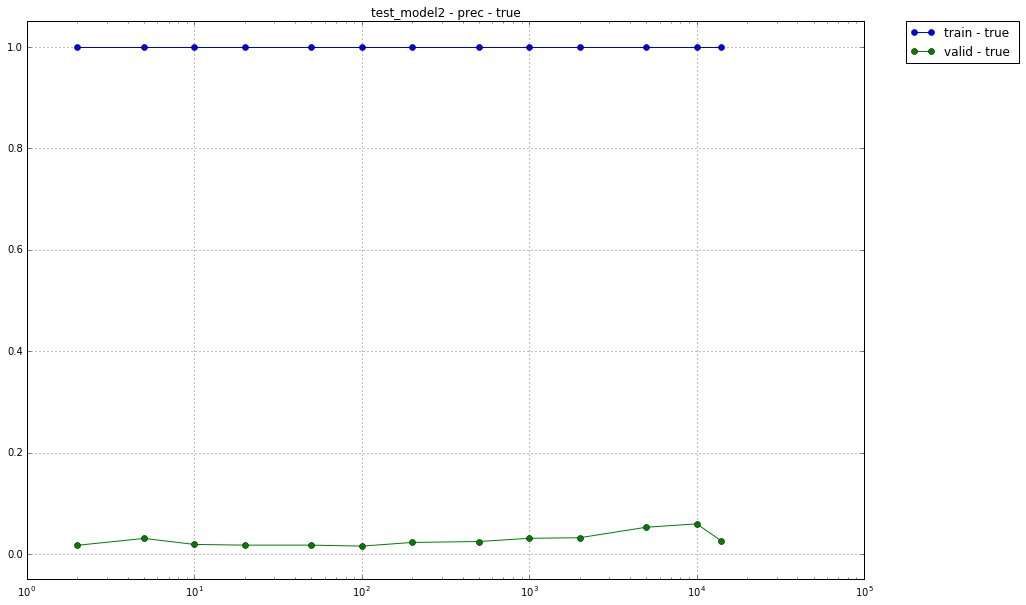

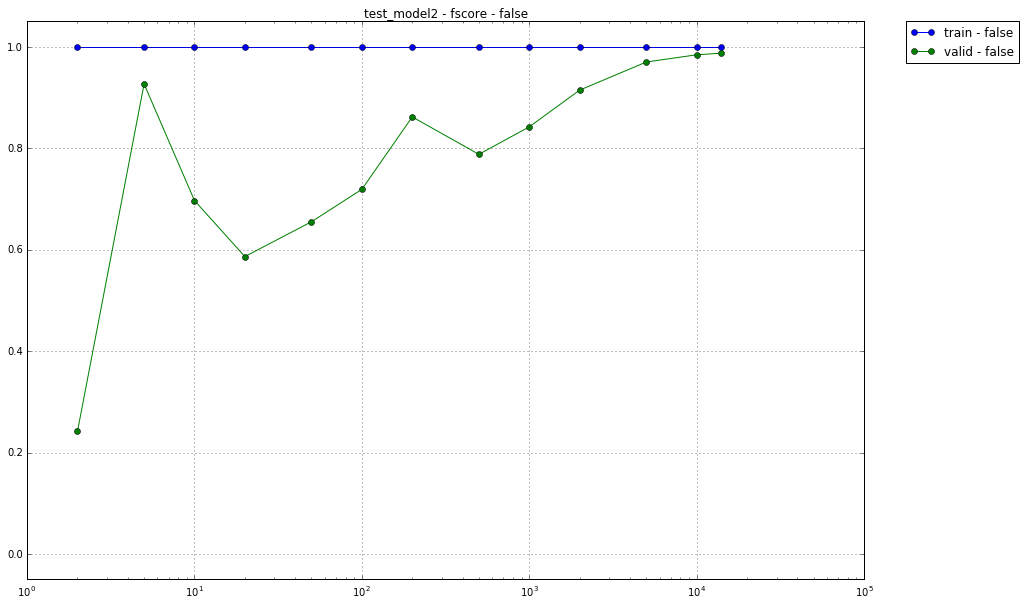

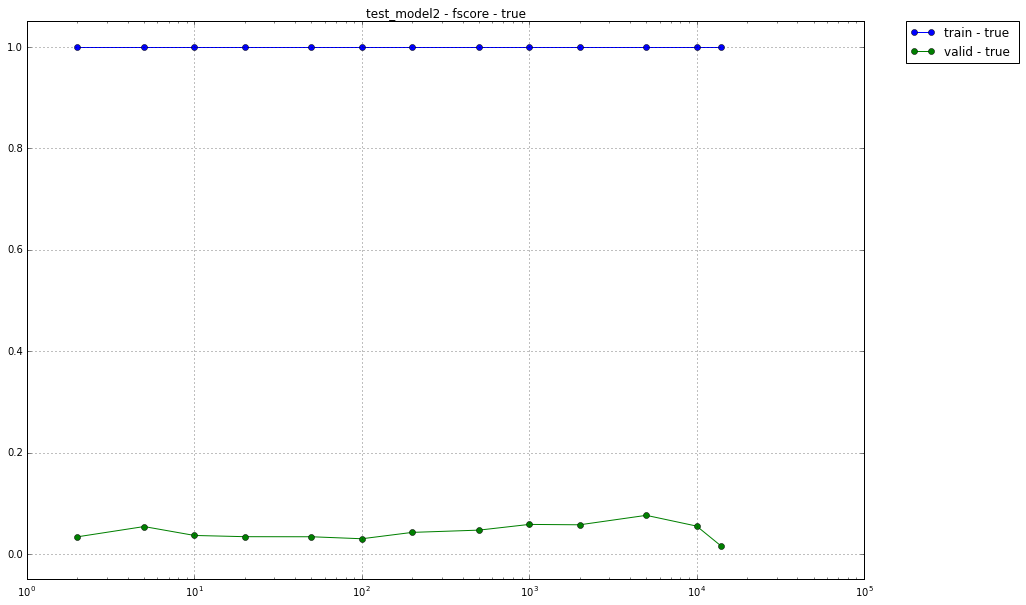

In [6]:
display(curves,"test_model2")

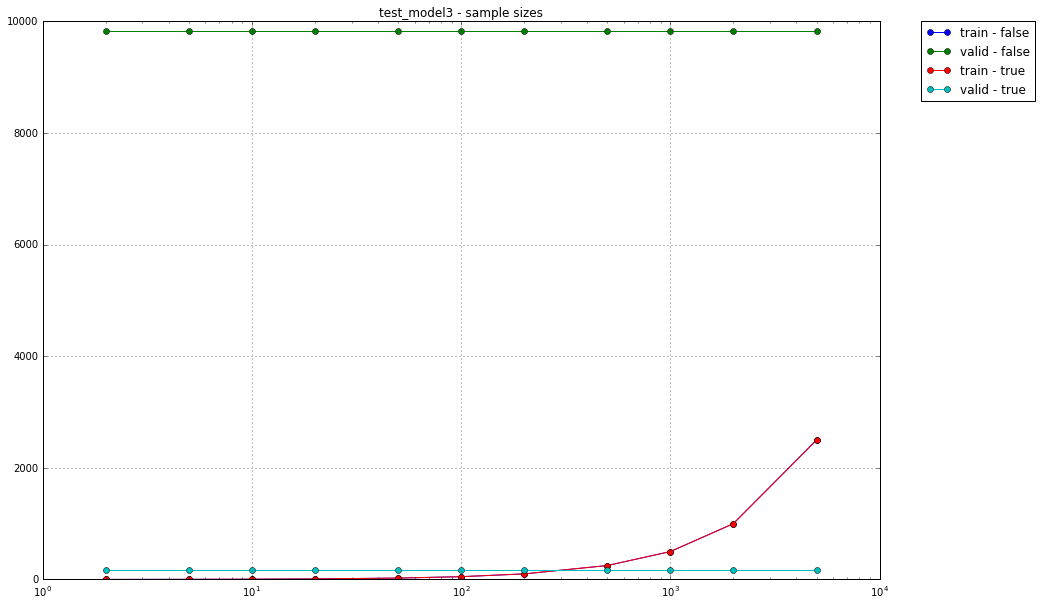

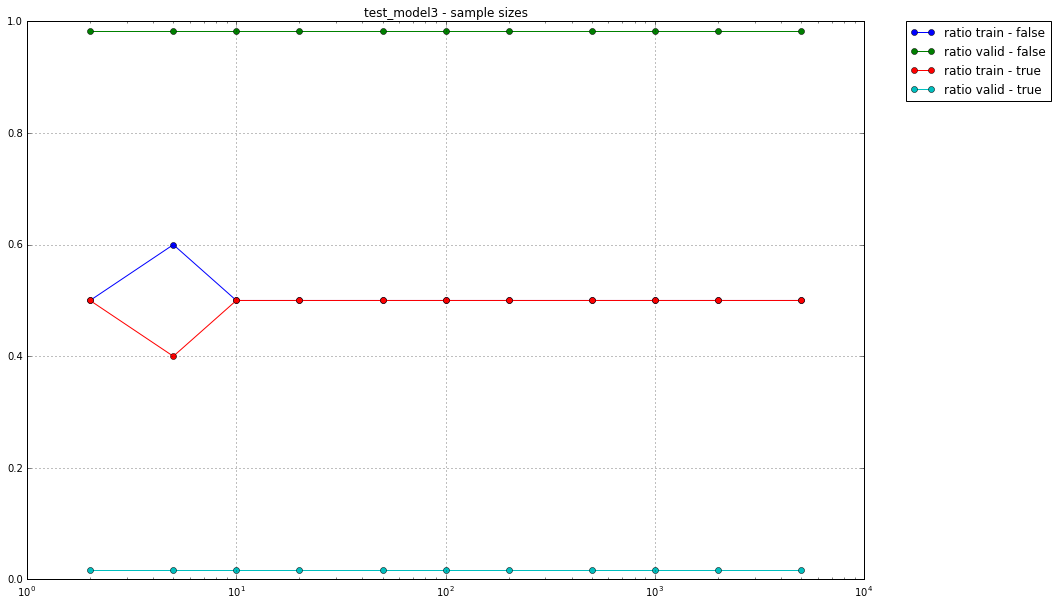

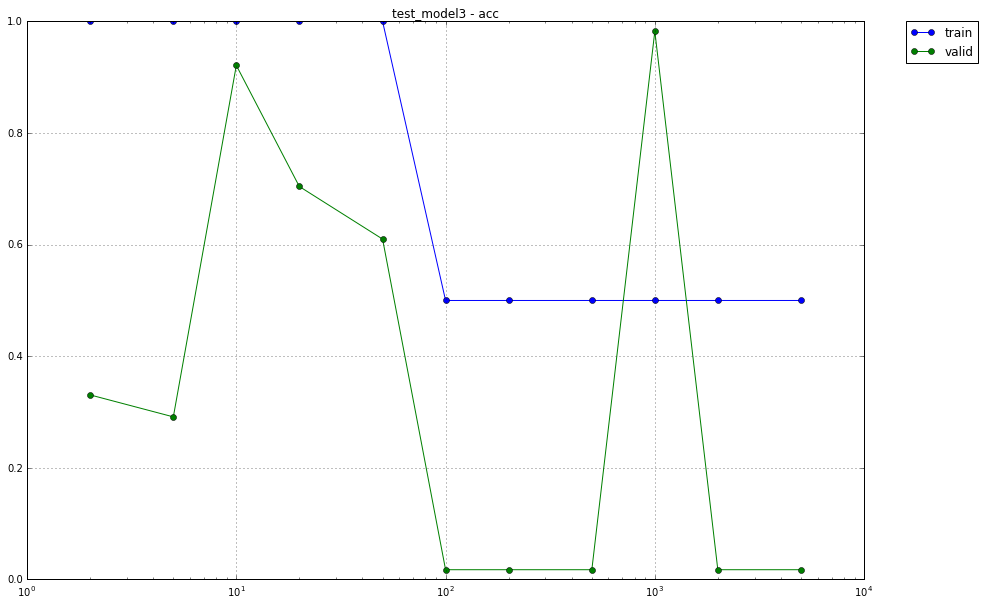

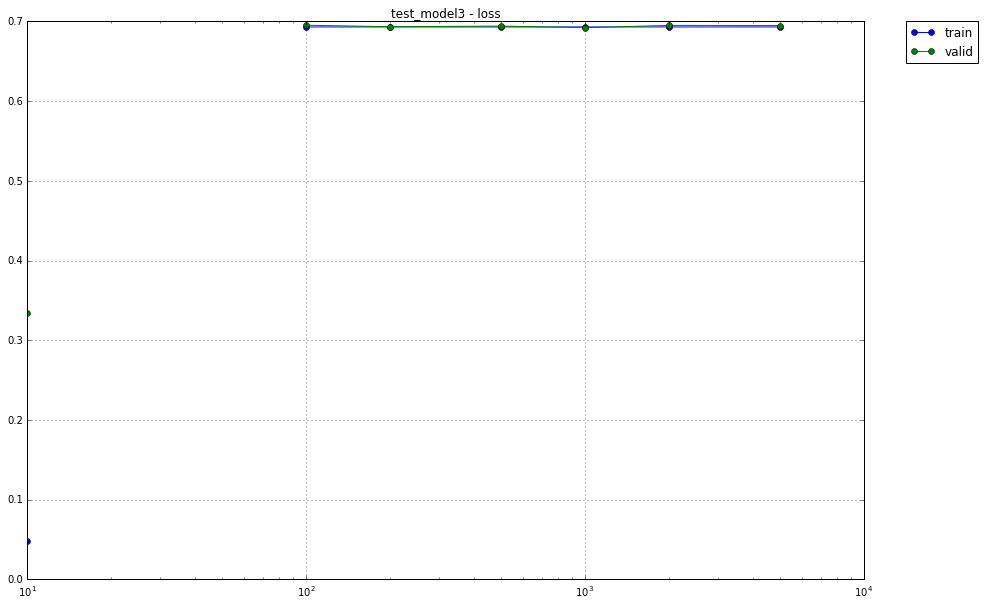

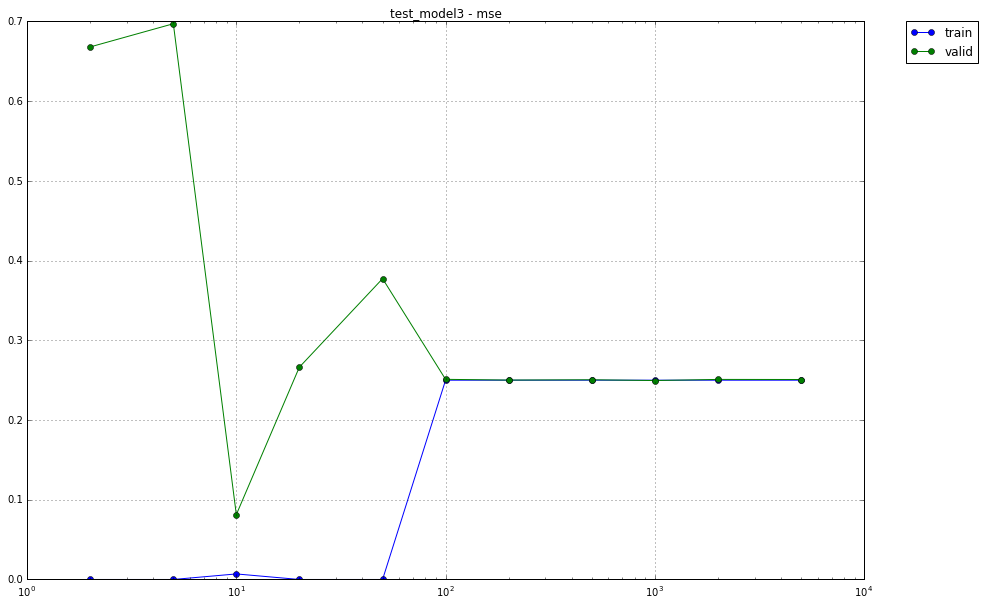

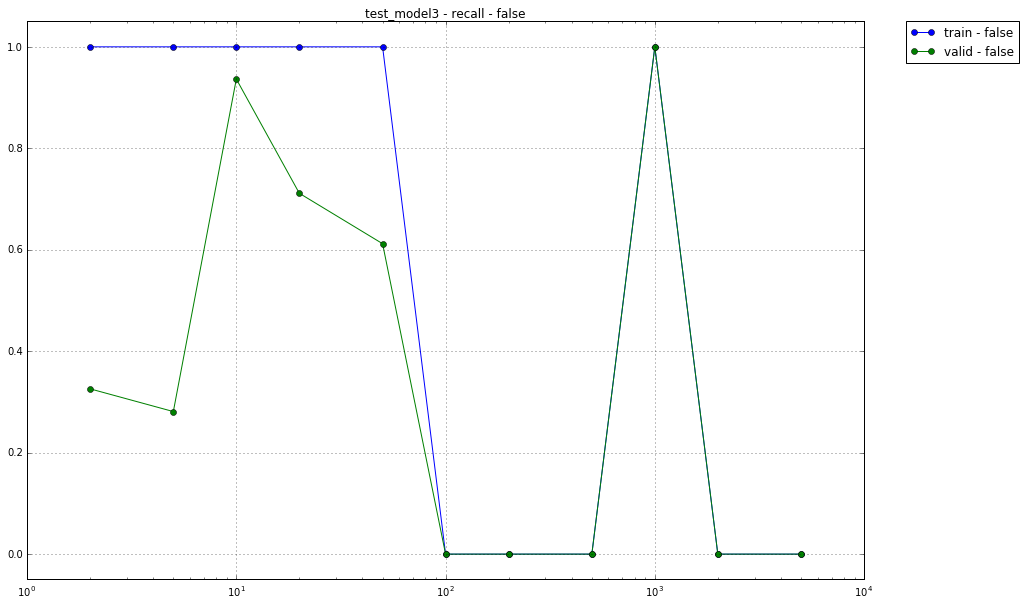

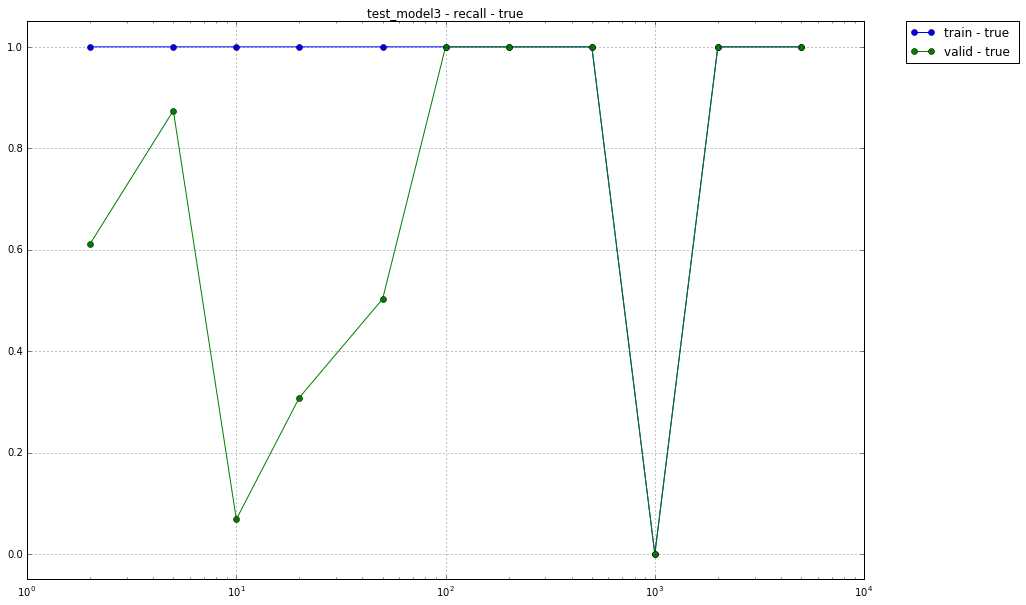

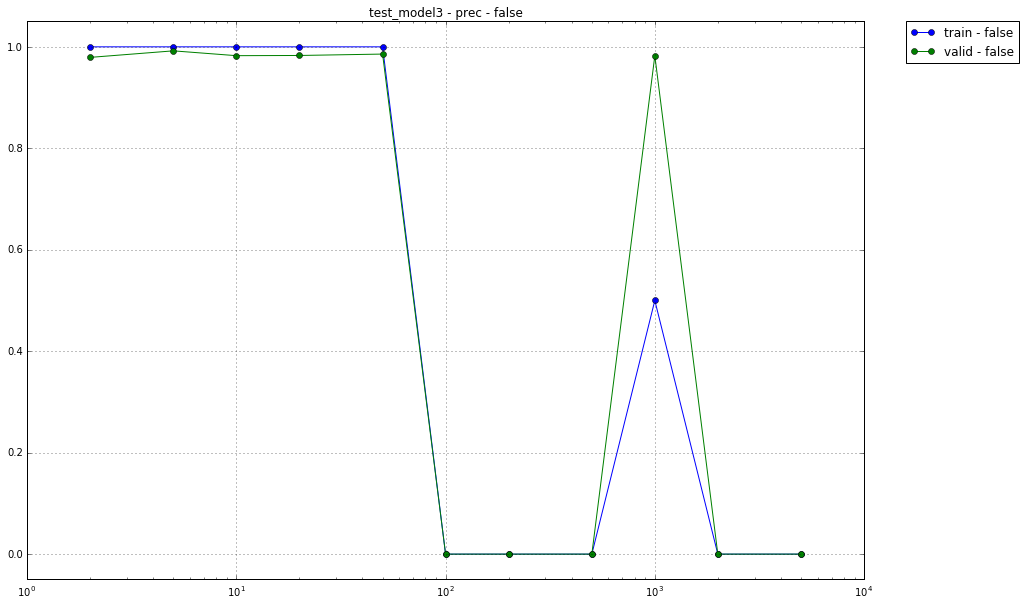

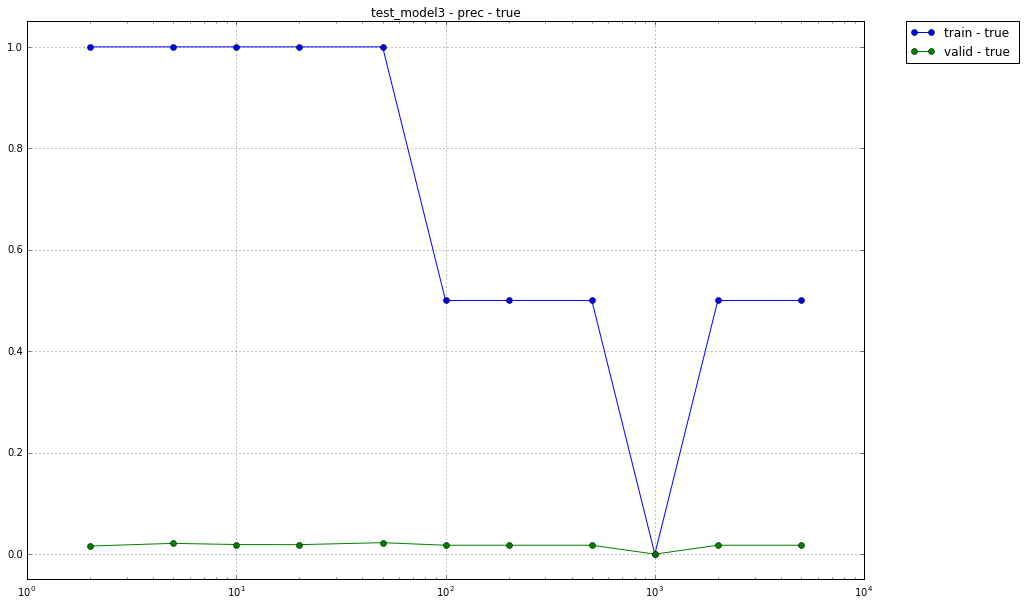

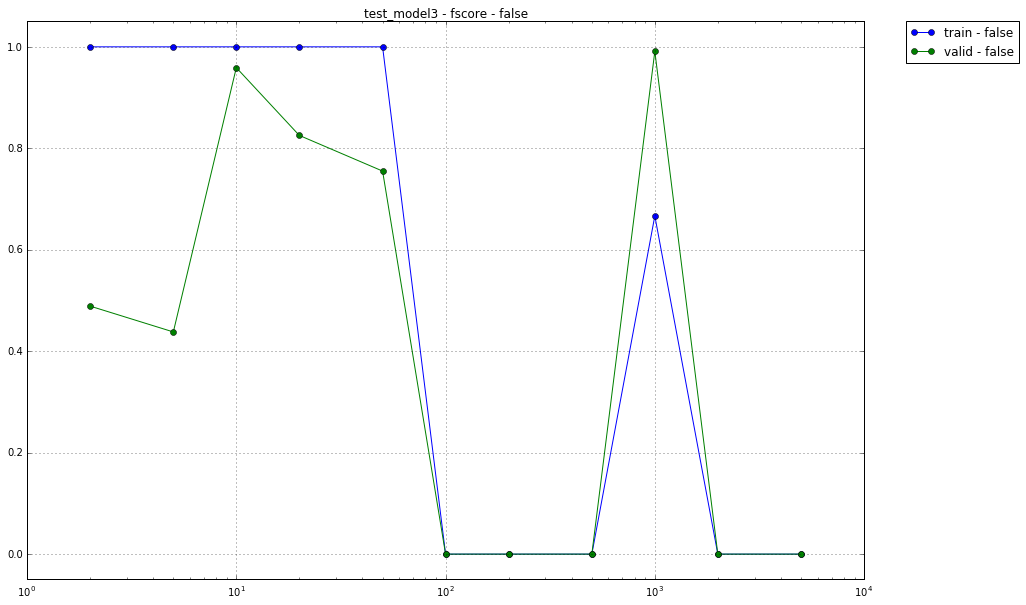

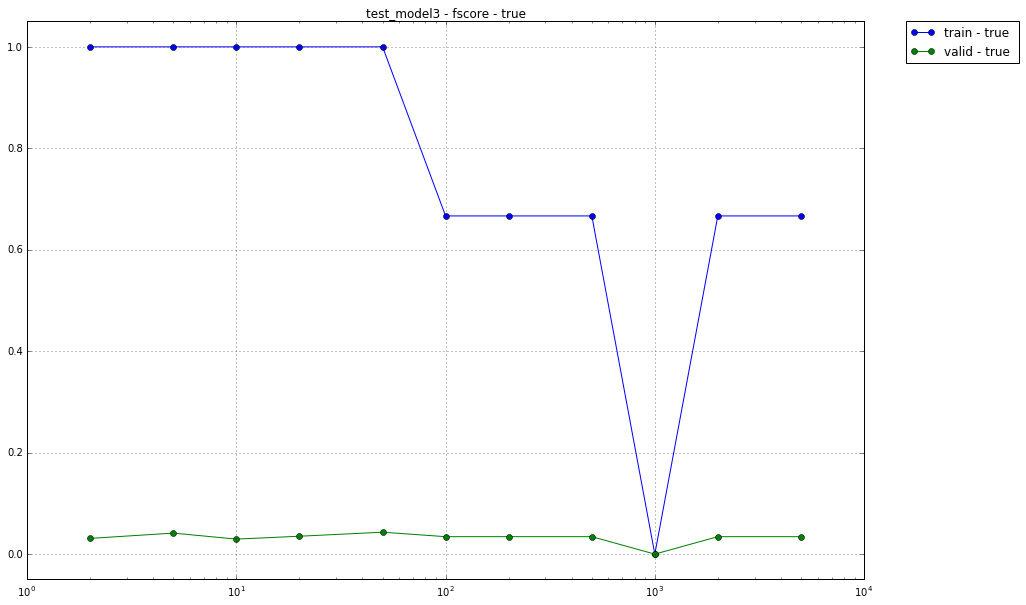

In [7]:
display(curves, "test_model3")

In [9]:
display(curves, "test_model4")

IndexError: too many indices for array

In [10]:
display(curves, "test_model5")

IndexError: too many indices for array

In [ ]:
from sklearn.metrics import precision_recall_fscore_support
y_true = np.array([1,0,1,1,1,0,1,0,0,1])   # 6 true, 4 false
y_pred = np.array([1,0,1,0,1,0,1,1,1,1])   # 7 true, 3 false 
precision_recall_fscore_support(y_true, y_pred)

# pred correct wrong  tot   precision 
# F       2     1      3     - 2/3
# T       5     2      7     - 5/7
# -- ie the percent correct in the  predictions  - 1.0 is best

# actual correct wrong  tot   recall
# F         2     2      4     - 2/4
# T         5     1      6     - 5/6
# -- ie the pecent of actual items that are are marked right - 1.0 is best

# f1score = 2*prec*recall / (prec + recall)  - 1.0 is the best
# F    (2*2/3*2/4) /( 2/3+2/4) = (8/12) / (14/12) = 8/14
# T    (2*5/7*5/6) /( 5/7+5/6) = (50/42) / (65/42) = 50/65

In [68]:
y_true = np.array([1,0,1,1,1,0,1,0,0,1])   # 6  true, 4 false
y_pred = np.array([1,1,1,1,1,1,1,1,1,1])   # 10 true, 0 false 
precision_recall_fscore_support(y_true, y_pred)

/usr/local/lib/python2.7/dist-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


(array([ 0. ,  0.6]), array([ 0.,  1.]), array([ 0.  ,  0.75]), array([4, 6]))